# 🧩 4.3 – Abstracción y Polimorfismo

En este notebook aprenderás a diseñar sistemas orientados a objetos más **flexibles y extensibles**, utilizando dos principios fundamentales:

- **Abstracción:** definir interfaces comunes sin implementar detalles concretos.
- **Polimorfismo:** distintas clases pueden compartir métodos con el mismo nombre, pero comportamientos diferentes.

---
## 🎯 Objetivos
- Comprender el propósito de la abstracción y cómo implementarla con `abc`.
- Aplicar polimorfismo en jerarquías de clases.
- Crear sistemas que usen objetos intercambiables según su comportamiento.
- Practicar la sobrescritura de métodos para especializar clases hijas.

In [1]:
print('✅ Notebook 4.3 – Abstracción y Polimorfismo cargado correctamente.')

✅ Notebook 4.3 – Abstracción y Polimorfismo cargado correctamente.


---
## 1️⃣ Abstracción: clases base y métodos abstractos

Una **clase abstracta** sirve como plantilla para otras clases. Obliga a las subclases a implementar ciertos métodos, pero no cómo deben hacerlos. No se puede instanciar directamente.
Se implementa con el módulo `abc` (*Abstract Base Class*).

Ejemplo básico:

Sintaxis general para crear clase abstracta:

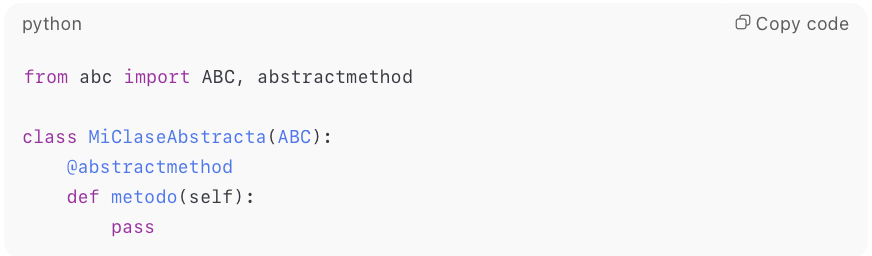

In [4]:
from abc import ABC, abstractmethod

class Figura(ABC):
    @abstractmethod
    def area(self): # es un método de instancia, por lo que lleva self
        pass

class Circulo(Figura):
    def __init__(self, radio):
        self.radio = radio

    def area(self):
        return 3.1416 * self.radio ** 2

f = Circulo(5)
print(f.area())

78.53999999999999


✅ La clase `Figura` define una interfaz común (`area()`), pero **cada subclase la implementa a su manera**.

**TIPOS DE MÉTODOS Y CÓMO DIFERENCIARLOS:**

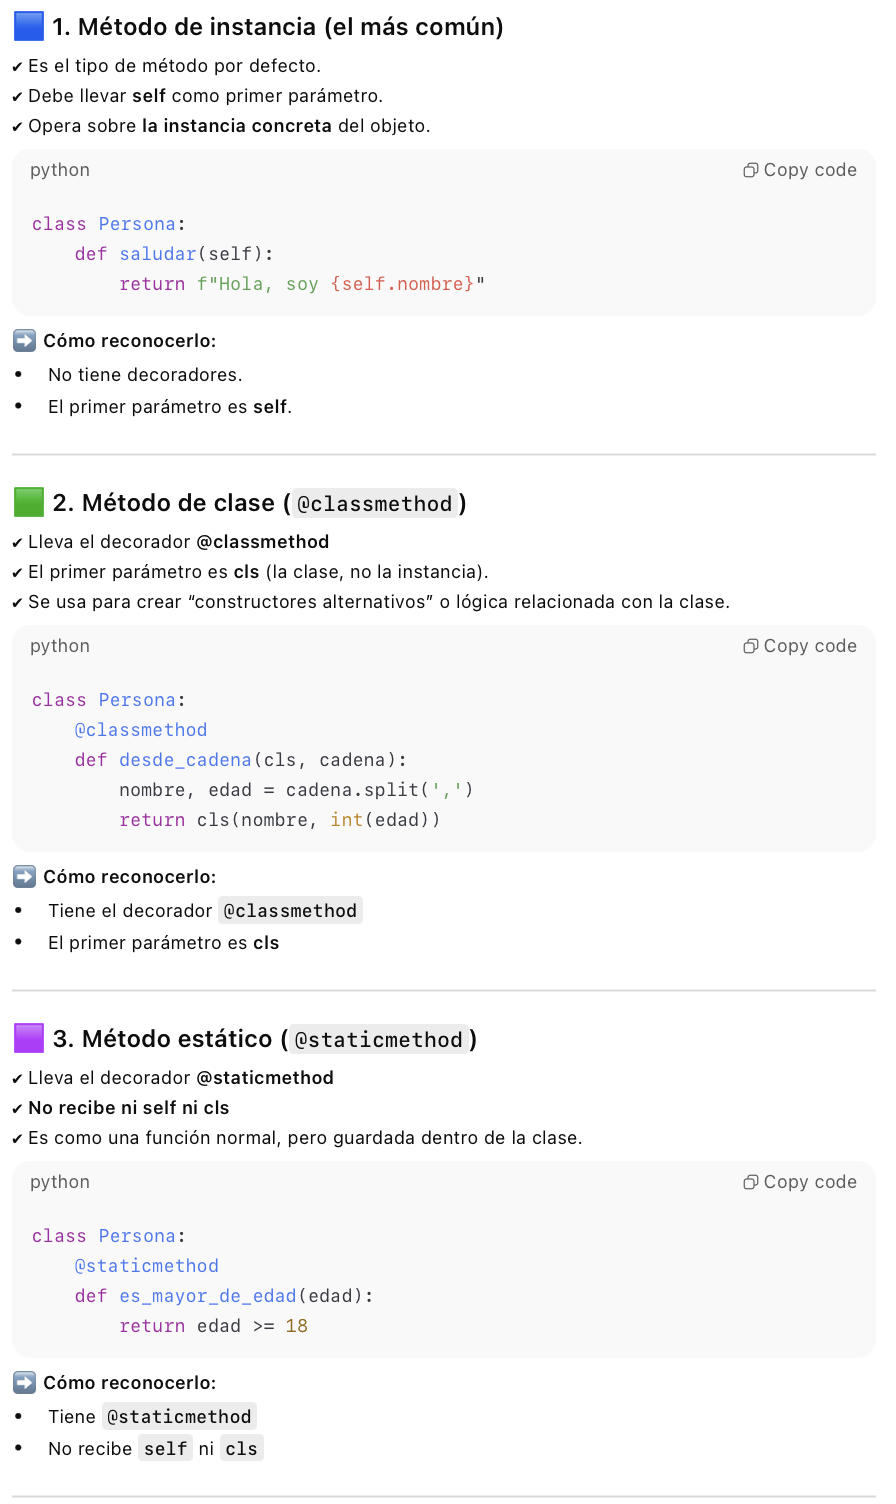

**CUÁNDO USAR CADA TIPO DE ATRIBUTO:**

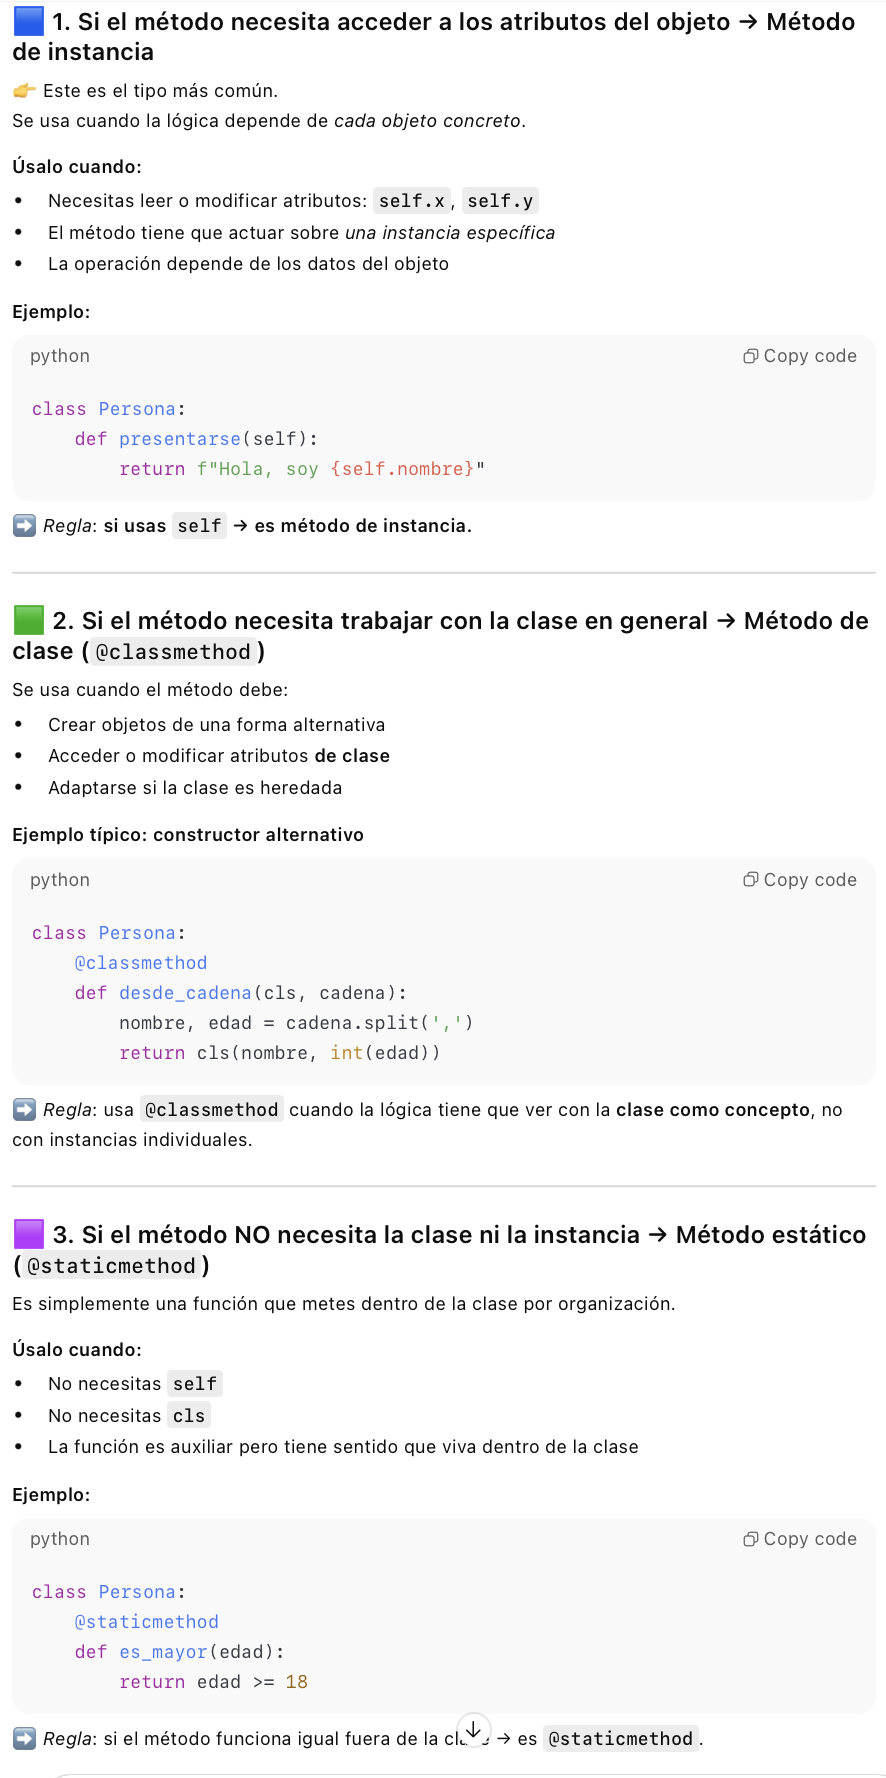

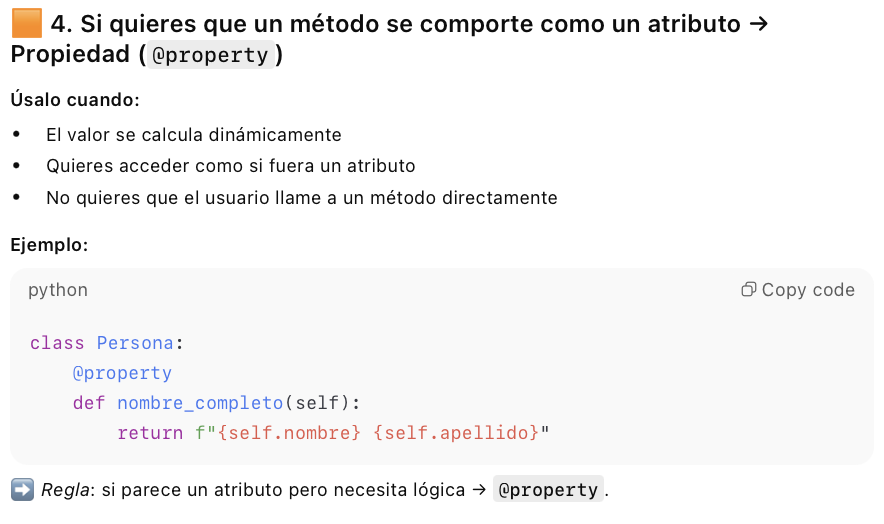

---
## 2️⃣ Ejercicio 1 — Clase abstracta de transporte

Crea:
- Una clase abstracta `Transporte` con el método abstracto `mover()`.
- Dos subclases: `Coche` y `Barco`, cada una con su propia implementación de `mover()`.

💡 *Pista:* usa el decorador `@abstractmethod` y hereda de `ABC`.

In [7]:
# Escribe aquí tu código...

from abc import ABC, abstractmethod

class Transporte(ABC):
    @abstractmethod
    def mover(self):
        return 'Me estoy moviendo'
    
class Coche(Transporte): # Heredando de "Transporte", garantizo que las subclases tengan el método "mover". Si se nos
                        # olvida, Python lanza un error recordándolo.
    def mover(self):
        return 'Estoy rodando'

# Aunque "Transporte" no tenga nada, define la jerarquía.

class Barco(Transporte):
    def mover(self):
        return 'Estoy navegando'
    
vehiculos = [Coche(), Barco()]

# Nota: no se podría instanciar "Transporte()" porque es una clase abstracta.

for v in vehiculos:
    print(v.mover())

Estoy rodando
Estoy navegando


**CONCLUSIÓN:**

Heredas de una clase abstracta no para reutilizar código, sino para imponer reglas y asegurar coherencia entre todas las subclases.

### ✅ Solución propuesta

In [8]:
class Transporte(ABC):
    @abstractmethod
    def mover(self):
        pass

class Coche(Transporte):
    def mover(self):
        return '🚗 El coche avanza por carretera.'

class Barco(Transporte):
    def mover(self):
        return '⛵ El barco navega por el mar.'

vehiculos = [Coche(), Barco()]
for v in vehiculos:
    print(v.mover())

🚗 El coche avanza por carretera.
⛵ El barco navega por el mar.


✅ Las subclases deben implementar los métodos abstractos definidos en la clase base.

---
## 3️⃣ Polimorfismo: mismo método, diferentes comportamientos

El **polimorfismo** permite invocar el mismo método en objetos distintos, sin preocuparse de su tipo exacto. Una misma operación se comporta de diferentes formas según el objeto. Se usa el mismo método en objetos diferentes, obteniendo comportamientos distintos.

Ejemplo clásico:

In [10]:
class Gato:
    def hablar(self):
        return 'Miau'

class Perro:
    def hablar(self):
        return 'Guau'

animales = [Gato(), Perro()]
for a in animales:
    print(a.hablar())

# Los dos objetos tienen un método "hablar" pero se comportan de manera distinta.

Miau
Guau


El **polimorfismo** permite:
- Escribir código más genérico y flexible
- Ampliar programa sin modificar código existente
- Da coherencia a jerarquías de clases: clase abstracta + polimorfismo trabajan juntas
    - La clase abstracta define qué métodos deben existir
    - El polimorfismo permite que cada clase los implemente a su manera

✅ El polimorfismo permite tratar diferentes tipos de objetos de forma uniforme si comparten la misma interfaz (nombre de método).

---
## 4️⃣ Ejercicio 2 — Sistema de pagos polimórfico

Crea una jerarquía de clases para representar distintos **métodos de pago**:
- Clase abstracta `Pago` con método `procesar(cantidad)`.
- Subclases: `PagoTarjeta`, `PagoPaypal`, `PagoCripto`.
- Cada una implementa `procesar()` de forma diferente.

💡 *Pista:* puedes usar un bucle para procesar una lista con distintos tipos de pago.

In [ ]:
# Implementa aquí tus clases de pago...

class Pago(ABC):
    @abstractmethod
    def procesar(self, cantidad):
        return 'Estoy pagando'

class PagoTarjeta(Pago):
    def procesar(self): # aquí no da fallo de que falte el argumento "cantidad" porque "Pago" es un método abstracto.
                        # Si fuera una función normal, sí daría fallo.
        return 'Estoy pagando con tarjeta'

class PagoPaypal(Pago):
    def procesar(self):
        return 'Estoy pagando con PayPal'

class PagoCripto(Pago):
    def procesar(self):
        return 'Estoy pagando con cripto'

pagos = [PagoTarjeta(), PagoPaypal(), PagoCripto()]

for pago in pagos:
    print(pago.procesar())

Estoy pagando con tarjeta
Estoy pagando con PayPal
Estoy pagando con cripto


**NOTA**:
Python solo verifica que en la clase que hereda de la clase abstracta exista un método llamado "procesar". No verifica que los argumentos de procesar dentro de PagoTarjeta sean los mismos que en la clase abstracta "Pago". Sólo saltará el error si intento acceder al argumento "cantidad" dentro de PagoTarjeta si este no está definido.

### ✅ Solución propuesta

In [14]:
class Pago(ABC):
    @abstractmethod
    def procesar(self, cantidad):
        pass

class PagoTarjeta(Pago):
    def procesar(self, cantidad):
        return f'💳 Procesando pago con tarjeta: {cantidad:.2f}€'

class PagoPaypal(Pago):
    def procesar(self, cantidad):
        return f'💻 Pago con PayPal realizado por {cantidad:.2f}€'

class PagoCripto(Pago):
    def procesar(self, cantidad):
        return f'₿ Pago con criptomoneda equivalente a {cantidad:.2f}€'

pagos = [PagoTarjeta(), PagoPaypal(), PagoCripto()]
for p in pagos:
    print(p.procesar(150))

💳 Procesando pago con tarjeta: 150.00€
💻 Pago con PayPal realizado por 150.00€
₿ Pago con criptomoneda equivalente a 150.00€


✅ Cada clase concreta implementa el método `procesar()` según su propia lógica, pero todas comparten la misma interfaz `Pago`.

---
## 5️⃣ Ejercicio 3 — Polimorfismo extendido

Crea una lista `transacciones` que contenga diferentes objetos de `Pago`. 
Implementa una función `ejecutar_transacciones(pagos, monto)` que recorra la lista y ejecute `procesar(monto)` para cada elemento.

💡 *Objetivo:* demostrar que el código funciona con cualquier clase que implemente la interfaz `Pago`.

In [15]:
# 💡 Escribe tu función ejecutar_transacciones aquí...

transacciones = [PagoTarjeta(), PagoPaypal(), PagoCripto()]

def ejecutar_transacciones(pagos, monto):
    for pago in pagos:
        print(pago.procesar(monto))

ejecutar_transacciones(transacciones, 250)

💳 Procesando pago con tarjeta: 250.00€
💻 Pago con PayPal realizado por 250.00€
₿ Pago con criptomoneda equivalente a 250.00€


### ✅ Solución propuesta

In [16]:
def ejecutar_transacciones(pagos, monto):
    for p in pagos:
        print(p.procesar(monto))

transacciones = [PagoTarjeta(), PagoCripto(), PagoPaypal()]
ejecutar_transacciones(transacciones, 250)

💳 Procesando pago con tarjeta: 250.00€
₿ Pago con criptomoneda equivalente a 250.00€
💻 Pago con PayPal realizado por 250.00€


✅ El código no depende del tipo específico de objeto, sino de su **interfaz común**.

---
## 🧠 Resumen del notebook

- **Abstracción:** permite definir una estructura común sin implementación concreta.
- **Polimorfismo:** distintos objetos pueden compartir una interfaz y comportarse de forma diferente.
- Las clases abstractas se definen con `abc.ABC` y `@abstractmethod`.
- Facilita el diseño de sistemas **extensibles y desacoplados**.

💡 Próximo paso → **4.4 – Colecciones de Objetos y Relaciones entre Clases.**